In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/Colab Notebooks/ImageSegmentation')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1. Tiềm năng của Semantic Segmentation trong y sinh

## 1.1. Ứng dụng của Semantic Segmentation trong y sinh

Trong y tế có rất nhiều các bài toán có thể ứng dụng Semantic Segmentation, mang lại hiệu quả và đột phá trong chuẩn đoán và điều trị bệnh. Một trong số những ứng dụng điển hình đó chính là chuẩn đoán khối u qua hình ảnh. Những loại ung thư phổ biến như ung thư vú, ung thư phổi, ung thư gan đều có thể được phát hiện sớm nhờ AI và qua đó góp phần giảm tỷ lệ tử vong của người bệnh. Cũng nhờ AI, các quyết định của bác sĩ về tình trạng bệnh trở nên chuẩn xác hơn.

Trong phẫu thuật thần kinh, các bác sĩ phải tiến hành phẫu thuật trên một hệ thống dây thần kinh rất nhạy cảm và phức tạp. Để chuẩn bị tốt hơn cho ca phẫu thuật, bác sĩ cần hình dung được vị trí những vùng cần giải phẫu một cách chi tiết và _chính xác_. Nhờ thuật toán semantic segmentation mà các mô hình 3D mô phỏng lại hộp sọ, hệ thống dây thần kinh và vị trí các khối u được dựng lại một cách tương đối chính xác. Thông qua đó giúp bác sĩ tiến hành ca phẫu thuật thành công hơn.

Ngoài ra các bệnh liên quan đến tắc nghẽn mạch máu trong hệ thần kinh, thường xảy ra ở người già, gây biến chứng nghiêm trọng như bại não, liệt nửa người có thể được phát hiện nhờ semantic segmentation các hình ảnh chụp não.

Các bệnh về nhãn cầu cũng có thể được phát hiện thông qua semantic segmentation. Và còn rất nhiều những tiềm năng ứng dụng khác của AI đang tiếp tục được khai phá và áp dụng.

## 1.2. Một số bộ dữ liệu trong Semantic Segmentation

Có rất nhiều các bộ dữ liệu liên quan đến phân khúc ngữ nghĩa hình ảnh (Semantic Segmantion) dành cho y sinh đã được các bác sĩ chuyên khoa gán nhãn. Mỗi một bộ dữ liệu phục vụ chuẩn đoán một loại bệnh lý khác nhau. Trong đó có thể kể tới:

* [Breast Cancer Cell Segmentation](https://www.kaggle.com/andrewmvd/breast-cancer-cell-segmentation): Bộ dữ liệu chuẩn đoán ung thư vú, gồm 58 ảnh H&E.

* [Alzheimer's Disease Neuroimaging Initiative (ADNI)](http://adni.loni.usc.edu/): Bộ dữ liệu thần kinh chuẩn đoán bệnh Alzheimer.

* [LUNA dataset](https://luna16.grand-challenge.org/data/): Bộ dữ liệu chuẩn đoán ung thư phổi.

Trong bài viết này chúng ta sẽ thực hành xây dựng và đánh giá mô hình Unet trên bộ dữ liệu [ISBI](http://brainiac2.mit.edu/isbi_challenge/), một bộ dữ liệu về phân khúc cấu trúc thần kinh nơ ron.

![](http://brainiac2.mit.edu/isbi_challenge/sites/default/files/Challenge-ISBI-2012-sample-image.png)

Mục tiêu của chúng ta là tìm hiểu cấu trúc dây thần kinh thông qua segment ảnh thành vùng nền và dây thần kinh. Bộ dữ liệu bao gồm 2 phần khác biệt:

* Train data: Là một bộ dữ liệu gồm 90 quan sát trong đó có 30 ảnh từ folder `train` và 60 ảnh từ folder `augumentation`. Dữ liệu là ảnh chụp các dây thần kinh bụng ấu trùng Drosophia được thu thập từ kính hiển vi điện tử (ssTEM). Đây là bài toán semantic segmentation với hai nhãn nên tương ứng với mỗi pixel chúng ta có một nhãn $\{0, 1\}$. Ảnh có màu trắng nếu pixels nằm ở vùng nền và màu đen nếu nằm trên dây thần kinh. 

* Test data: Dữ liệu test bao gồm 6 cặp ảnh input, output có cấu trúc như train data.



# 2. Thuật toán

Thị giác máy tính ứng dụng trong y sinh có rất nhiều các kiến trúc mạng khác nhau. Chẳng hạn như,
ở bài trước mình đã giới thiệu với các bạn về [Unet - Bài 40](https://phamdinhkhanh.github.io/2020/06/10/ImageSegmention.html#11-unet-2012). Kiến trúc mạng có hình chữ U gồm 2 phần thu hẹp và mở rộng tương ứng với nhánh bên trái và nhánh bên phải. Để không làm mất mát thông tin trong quá trình tích chập và giải chập thì các kết nối tắt được sử dụng để liên kết 2 khối cùng cấp ở mỗi nhánh.

![](https://imgur.com/lKZGO0C.png)

Ngoài kiến trúc Unet còn có `CUMedVision, DCAN, CFS-FCN` cũng là những mô hình phân khúc ảnh trong y sinh phổ biến. Nếu bạn đọc quan tâm có thể tìm kiếm lớp từ khóa `Biomedical Image Segmentation`.


# 3. Huấn luyện mô hình

Ở bài này mình sẽ hướng dẫn các bạn xây dựng, huấn luyện và đánh giá một mô hình Unet theo kiến trúc chuẩn. Không dừng lại ở đó, mình sẽ hướng dẫn bạn cách tạo ra một kiến trúc Unet mới, lấy ý tưởng từ kiến trúc cũ nhưng thay đổi độ phân giải của feature map theo lựa chọn của mình. Bạn sẽ thấy rằng việc kế thừa các ý tưởng về kiến trúc mạng trong thị giác máy tính là yếu tố quan trọng nhất. Khi nắm được ý tưởng về kiến trúc, bạn sẽ tự thiết kế ra những mô hình mới của riêng mình, với độ phân giải lớn hơn, kiến trúc sâu hơn và đôi khi là hiệu quả hơn.

Tóm lại, các mục tiêu của chúng ta sẽ là:

* Hiểu được cách tạo lập một kiến trúc mạng Unet trên keras.

* Tư duy thiết kế mô hình với nhiều biến thể khác nhau. Áp dụng phương pháp thử và sai để tìm ra kiến trúc phù hợp.

* Xử lý dữ liệu input/output và thực hiện Data Augumentation.

Các mô hình Unet được áp dụng bao gồm:

* Kiến trúc 1: Kế thừa lại kiến trúc chuẩn từ bài báo gốc của mạng Unet. Các bức ảnh được resize về đầu vào có kích thước $(572, 572)$ và Output sẽ có kích thước là $(386, 386)$.

* Kiến trúc 2: Chuẩn hóa lại kích thước output sao cho bằng với kích thước của input shape và cùng bằng $(512, 512)$.

Hãy cùng bắt đầu xây dựng mô hình.

# 4. Dữ liệu

Bộ dữ liệu được lấy tại [unet](https://github.com/zhixuhao/unet.git). Để download dữ liệu về chúng ta sử dụng câu lệnh git clone.

In [ ]:
!git clone https://github.com/zhixuhao/unet.git
!unzip unet-master.zip -d unet

fatal: destination path 'unet' already exists and is not an empty directory.
unzip:  cannot find or open unet-master.zip, unet-master.zip.zip or unet-master.zip.ZIP.


Các file huấn luyện được để trong folder `data/membrane/train`. Trong đó:

* folder `image`: Chứa các hình ảnh huấn luyện.
* folder `label`: Chứa nhãn ${0, 1}$ của hình ảnh huấn luyện.

Tiếp theo ta sẽ visualize các ảnh huấn luyện và nhãn tương ứng của nó.



In [ ]:
import glob2

img_5_paths = sorted(glob2.glob('unet/data/membrane/train/image/*.png'))[:5]
label_5_paths = sorted(glob2.glob('unet/data/membrane/train/label/*.png'))[:5]

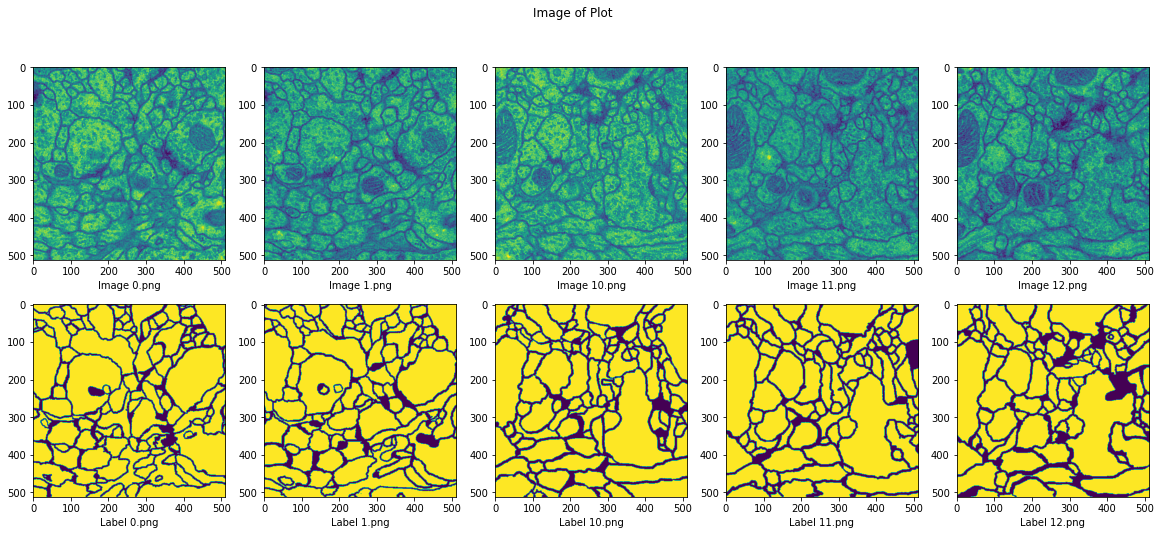

In [ ]:
# Visualize top 5 ảnh đầu tiên
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

# Khởi tạo subplot với 1 dòng 5 cột.
fg, ax = plt.subplots(2, 5, figsize=(20, 8))
fg.suptitle('Image of Plot')

for i, path in enumerate(img_5_paths):
  image = plt.imread(path)
  ax[0, i].imshow(image)
  ax[0, i].set_xlabel('Image ' + path.split('/')[-1])

for i, path in enumerate(label_5_paths):
  label = plt.imread(path)
  ax[1, i].imshow(label)
  ax[1, i].set_xlabel('Label ' + path.split('/')[-1])

Nhãn 0 là các vị trí thuộc dây thần kinh, nhãn 1 là vị trí thuộc vùng nền.

Ta có thể thấy ở ảnh label các giá trị nhiễu đã được loại bỏ. Ảnh chỉ còn giữ lại dây thần kinh và vùng nền, qua đó chúng ta thu được một map cấu trúc của hệ thần kinh bụng ấu trùng Drosophia rõ ràng hơn. 

Tiếp theo chúng ta cùng triển khai Unet version 1

# 5. Unet version 1

Đây sẽ là kiến trúc chuẩn của mạng Unet. Bên dưới ta sẽ tạo ra hai hàm số với hai công dụng khác nhau. Một hàm khởi tạo nhánh thu hẹp là `_downsample_cnn_block()` và một hàm khởi tạo nhánh mở rộng là `_upsample_cnn_block()`.

Tại layer cuối cùng của mạng chúng ta áp dụng `activation=sigmoid` để dự đoán xác suất nhãn.

In [ ]:
import tensorflow as tf
INPUT_SHAPE = 572
OUTPUT_SHAPE = 386

def _downsample_cnn_block(block_input, channel, is_first = False):
  if is_first:  
    conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(block_input)
    conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(conv1)
    return [block_input, conv1, conv2]
  else:
    maxpool = tf.keras.layers.MaxPool2D(pool_size=2)(block_input)
    conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(maxpool)
    conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(conv1)
    return [maxpool, conv1, conv2]

def _upsample_cnn_block(block_input, block_counterpart, channel, is_last = False):  
  # Upsampling block
  uppool1 = tf.keras.layers.Convolution2DTranspose(channel, kernel_size=2, strides=2)(block_input)
  # Crop block counterpart
  shape_input = uppool1.shape[2]
  shape_counterpart = block_counterpart.shape[2]
  crop_size = int((shape_counterpart-shape_input)/2)
  block_counterpart_crop = tf.keras.layers.Cropping2D(cropping=((crop_size, crop_size), (crop_size, crop_size)))(block_counterpart)
  concat = tf.keras.layers.Concatenate(axis=-1)([block_counterpart_crop, uppool1])
  conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(concat)
  conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(conv1)
  if is_last:
    conv3 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, activation='sigmoid')(conv2)
    return [concat, conv1, conv2, conv3]
  return [uppool1, concat, conv1, conv2]

In [ ]:
from tensorflow.keras.optimizers import Adam

def _create_model():
  ds_block1 = _downsample_cnn_block(tf.keras.layers.Input(shape=(INPUT_SHAPE, INPUT_SHAPE, 3)), channel=64, is_first = True)
  ds_block2 = _downsample_cnn_block(ds_block1[-1], channel=128)
  ds_block3 = _downsample_cnn_block(ds_block2[-1], channel=256)
  ds_block4 = _downsample_cnn_block(ds_block3[-1], channel=512)
  ds_block5 = _downsample_cnn_block(ds_block4[-1], channel=1024)
  us_block4 = _upsample_cnn_block(ds_block5[-1], ds_block4[-1], channel=512)
  us_block3 = _upsample_cnn_block(us_block4[-1], ds_block3[-1], channel=256)
  us_block2 = _upsample_cnn_block(us_block3[-1], ds_block2[-1], channel=128)
  us_block1 = _upsample_cnn_block(us_block2[-1], ds_block1[-1], channel=64, is_last = True)
  model = tf.keras.models.Model(inputs = ds_block1[0], outputs = us_block1[-1])
  model.compile(optimizer=Adam(lr = 1e-4), loss='binary_crossentropy', metrics='accuracy')
  return model

model = _create_model()

Tiếp theo chúng ta sẽ phân chia tập train/validation

In [ ]:
from sklearn.model_selection import train_test_split
import glob2

image_augs = glob2.glob('unet/data/membrane/train/aug/*.png')
label_path_aug = [item for item in image_augs if 'mask_' in item]
image_names = [item.split('/')[-1] for item in label_path_aug]
image_path_aug = ['unet/data/membrane/train/aug/image'+item[4:] for item in image_names]

image_paths = glob2.glob('unet/data/membrane/train/image/*.png')
label_paths = ['unet/data/membrane/train/label/' + path.split('/')[-1] for path in image_paths]

image_paths += image_path_aug
label_paths += label_path_aug

train_img_paths, val_img_paths, train_label_paths, val_label_paths = train_test_split(image_paths, label_paths, test_size = 0.2)

Chuẩn bị dữ liệu train/validation

In [ ]:
import cv2

def _image_read_paths(train_img_paths, train_label_paths):
  X, Y = [], []
  for image_path, label_path in zip(train_img_paths, train_label_paths):
    image = cv2.imread(image_path)
    image_resize = cv2.resize(image, (INPUT_SHAPE, INPUT_SHAPE), cv2.INTER_LINEAR)
    label = cv2.imread(train_label_paths[0])
    label_gray = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
    label_resize = cv2.resize(label_gray, (OUTPUT_SHAPE, OUTPUT_SHAPE), cv2.INTER_LINEAR)
    label_binary = np.array(label_resize == 255).astype('float32')
    label_binary = label_binary[..., np.newaxis]
    X.append(image_resize)
    Y.append(label_binary)
  X = np.stack(X)
  Y = np.stack(Y)
  return X, Y

X_train, Y_train = _image_read_paths(train_img_paths, train_label_paths)
print(X_train.shape, Y_train.shape)
X_val, Y_val = _image_read_paths(val_img_paths, val_label_paths)
print(X_val.shape, Y_val.shape)

(72, 572, 572, 3) (72, 386, 386, 1)
(18, 572, 572, 3) (18, 386, 386, 1)


Tập train được lấy ngẫu nhiên 72 ảnh và tập validation là 18 ảnh. Tỷ trệ train/validation là 80:20.

Huấn luyện mô hình trên 100 epochs sử dụng EarlyStopping với khoảng cách tăng loss liên tiếp là 2 epochs thì dừng lại (`patience=2`).

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

history=model.fit(X_train, Y_train,
  validation_data = (X_val, Y_val),
  batch_size = 8,
  epochs = 100,
  callbacks = (EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True))
  # callbacks = [lr_callback]
)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

Epoch 1/100
9/9 [==============================] - 8s 885ms/step - loss: 11.7976 - accuracy: 0.5765 - val_loss: 3.7939 - val_accuracy: 0.4403
Epoch 2/100
9/9 [==============================] - 6s 710ms/step - loss: 2.3643 - accuracy: 0.5644 - val_loss: 1.3150 - val_accuracy: 0.6035
Epoch 3/100
9/9 [==============================] - 6s 708ms/step - loss: 1.3719 - accuracy: 0.5860 - val_loss: 1.0447 - val_accuracy: 0.6165
Epoch 4/100
9/9 [==============================] - 6s 708ms/step - loss: 1.0453 - accuracy: 0.5868 - val_loss: 0.8803 - val_accuracy: 0.6126
Epoch 5/100
9/9 [==============================] - 6s 707ms/step - loss: 0.9094 - accuracy: 0.5980 - val_loss: 0.8264 - val_accuracy: 0.5754
Epoch 6/100
9/9 [==============================] - 6s 707ms/step - loss: 0.8306 - accuracy: 0.6005 - val_loss: 0.8205 - val_accuracy: 0.6806
Epoch 7/100
9/9 [==============================] - 6s 706ms/step - loss: 0.8166 - accuracy: 0.6096 - val_loss: 0.7372 - val_accuracy: 0.6582
Epoch 8/100


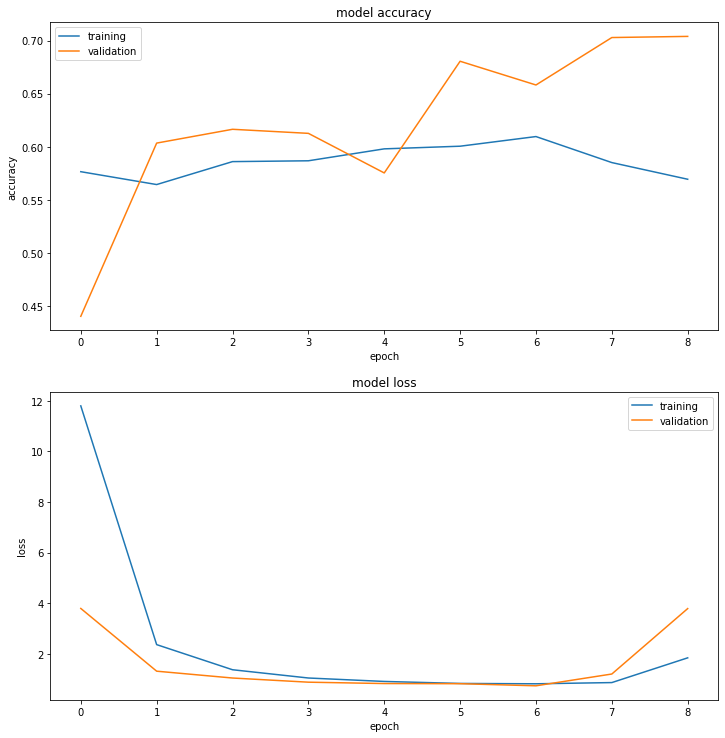

In [ ]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

Mô hình đạt accuracy đâu đó gần 60% trên tập train và 70% trên tập validation. Đối với bài toán image segmentation ít nhãn thì đây là một kết quả chưa thực sự tốt. Chúng ta cùng thử nghiệm version 2 với nhiều ý tưởng hơn.

# 6. Unet version 2

Ở version 2 mình sẽ thay đổi kích thước INPUT_SHAPE và OUTPUT_SHAPE là bằng nhau. Lý do là vì khi kích thước bằng nhau mô hình sẽ không bị mất mát thông tin về vị trí và không gian. Một số lớp mô hình SOTA hiện nay đều đưa ảnh mask về cùng kích thước với input.

Để làm được như vậy, các layer mình sử dụng `padding = same`. Khi đó kích thước nhánh trái và nhánh phải là tương đương và chúng ta không cần phải crop block trước khi kết nối tắt.

In [ ]:
import tensorflow as tf

INPUT_SHAPE = 512
OUTPUT_SHAPE = 512

def _downsample_cnn_block(block_input, channel, is_first = False):
  if is_first:  
    conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1, padding='same')(block_input)
    conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1, padding='same')(conv1)
    return [block_input, conv1, conv2]
  else:
    maxpool = tf.keras.layers.MaxPool2D(pool_size=2)(block_input)
    conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1, padding='same')(maxpool)
    conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1, padding='same')(conv1)
    return [maxpool, conv1, conv2]

def _upsample_cnn_block(block_input, block_counterpart, channel, is_last = False):  
  # Upsampling block
  uppool1 = tf.keras.layers.Convolution2DTranspose(channel, kernel_size=2, strides=2)(block_input)
  # Crop block counterpart
  shape_input = uppool1.shape[2]
  shape_counterpart = block_counterpart.shape[2]
  crop_size = int((shape_counterpart-shape_input)/2)
  block_counterpart_crop = tf.keras.layers.Cropping2D(cropping=((crop_size, crop_size), (crop_size, crop_size)))(block_counterpart)
  concat = tf.keras.layers.Concatenate(axis=-1)([block_counterpart_crop, uppool1])
  conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1, padding='same')(concat)
  conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1, padding='same')(conv1)
  if is_last:
    conv3 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='same', activation='sigmoid')(conv2)
    return [concat, conv1, conv2, conv3]
  return [uppool1, concat, conv1, conv2]

Khởi tạo model2

In [ ]:
from tensorflow.keras.optimizers import Adam

def _create_model2():
  ds_block1 = _downsample_cnn_block(tf.keras.layers.Input(shape=(INPUT_SHAPE, INPUT_SHAPE, 3)), channel=64, is_first = True)
  ds_block2 = _downsample_cnn_block(ds_block1[-1], channel=128)
  ds_block3 = _downsample_cnn_block(ds_block2[-1], channel=256)
  ds_block4 = _downsample_cnn_block(ds_block3[-1], channel=512)
  ds_block5 = _downsample_cnn_block(ds_block4[-1], channel=1024)
  us_block4 = _upsample_cnn_block(ds_block5[-1], ds_block4[-1], channel=512)
  us_block3 = _upsample_cnn_block(us_block4[-1], ds_block3[-1], channel=256)
  us_block2 = _upsample_cnn_block(us_block3[-1], ds_block2[-1], channel=128)
  us_block1 = _upsample_cnn_block(us_block2[-1], ds_block1[-1], channel=64, is_last = True)
  model = tf.keras.models.Model(inputs = ds_block1[0], outputs = us_block1[-1])
  model.compile(optimizer=Adam(lr = 1e-4), loss='binary_crossentropy', metrics='accuracy')
  return model

model2 = _create_model2()

Để công bằng trong 2 model Unet version 1 và Unet version 2 thì mình giữa nguyên tập huấn luyện và thẩm định như nhau ở 2 tập.

In [ ]:
import cv2

def _image_read_paths(train_img_paths, train_label_paths):
  X, Y = [], []
  for image_path, label_path in zip(train_img_paths, train_label_paths):
    image = cv2.imread(image_path)
    image_resize = cv2.resize(image, (INPUT_SHAPE, INPUT_SHAPE), cv2.INTER_LINEAR)
    label = cv2.imread(train_label_paths[0])
    label_gray = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
    label_resize = cv2.resize(label_gray, (OUTPUT_SHAPE, OUTPUT_SHAPE), cv2.INTER_LINEAR)
    label_binary = np.array(label_resize == 255).astype('float32')
    label_binary = label_binary[..., np.newaxis]
    # label_first_cn = np.array(label_resize == 255).astype('float32')
    # label_second_cn = np.array(label_resize == 0).astype('float32')
    # label_binary = np.stack([label_first_cn, label_second_cn], axis = 2)
    X.append(image_resize)
    Y.append(label_binary)
  X = np.stack(X)
  Y = np.stack(Y)
  return X, Y

X_train, Y_train = _image_read_paths(train_img_paths, train_label_paths)
print(X_train.shape, Y_train.shape)
X_val, Y_val = _image_read_paths(val_img_paths, val_label_paths)
print(X_val.shape, Y_val.shape)

(72, 512, 512, 3) (72, 512, 512, 1)
(18, 512, 512, 3) (18, 512, 512, 1)


Tiếp theo mô hình sẽ được huấn luyện với cầu hình `optimizer` và `EarlyStopping` tương tự như Unet version 1.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

history=model2.fit(X_train, Y_train,
  validation_data = (X_val, Y_val),
  batch_size = 8,
  epochs = 100,
  callbacks = (EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True))
)

Epoch 1/100
9/9 [==============================] - 9s 984ms/step - loss: 9.8058 - accuracy: 0.5660 - val_loss: 3.0570 - val_accuracy: 0.6813
Epoch 2/100
9/9 [==============================] - 7s 826ms/step - loss: 2.2515 - accuracy: 0.5839 - val_loss: 1.4266 - val_accuracy: 0.5627
Epoch 3/100
9/9 [==============================] - 7s 820ms/step - loss: 1.4040 - accuracy: 0.5757 - val_loss: 1.0193 - val_accuracy: 0.6286
Epoch 4/100
9/9 [==============================] - 7s 820ms/step - loss: 1.1057 - accuracy: 0.5887 - val_loss: 0.8780 - val_accuracy: 0.6419
Epoch 5/100
9/9 [==============================] - 7s 820ms/step - loss: 0.9512 - accuracy: 0.5975 - val_loss: 0.8093 - val_accuracy: 0.5872
Epoch 6/100
9/9 [==============================] - 7s 819ms/step - loss: 0.8674 - accuracy: 0.6058 - val_loss: 0.7607 - val_accuracy: 0.6039
Epoch 7/100
9/9 [==============================] - 7s 821ms/step - loss: 0.8268 - accuracy: 0.6098 - val_loss: 0.7295 - val_accuracy: 0.6329
Epoch 8/100
9

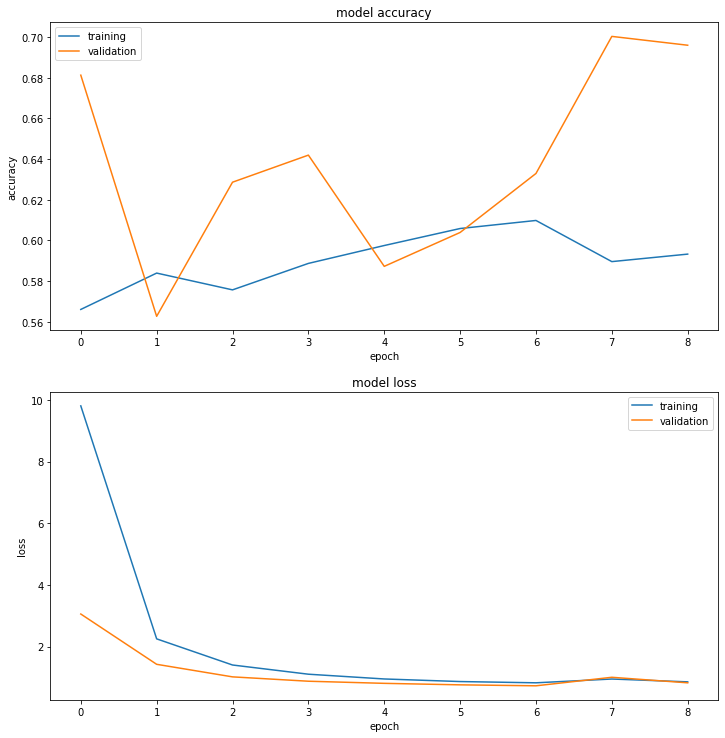

In [ ]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

Ở version 2 mô hình cũng không thực sự tốt hơn version. Kết quả độ chính xác đạt được trên tập train là khoảng 60% và trên tập validation là 70%. Nhưng đừng quá bi quan. Chúng ta hãy cũng phân tích để tìm ra các điểm mấu chốt nhằm cải thiện kết quả hơn nữa.

# 7. Phân tích

Huấn luyện các thuật toán Image2Image sẽ tốn RAM hơn so với các thuật toán Image Classification bởi vì dữ liệu được load vào là cặp ảnh `(input, output)`. Do đó ta không thiết lập batch_size với kích thước lớn hơn. Đây cũng là yếu tố khiến mô hình không học được sự tổng quát với batch_size nhỏ. Chúng ta có thể thử nghiệm tăng batch_size và huấn luyện trên một máy có RAM lớn hơn.

Trong quá trình xây dựng và huấn luyện mô hình, chúng ta không nên chỉ tin tưởng ở một kiến trúc mà nên thử nghiệm nhiều version với shape của input và output khác nhau để tìm ra kiến trúc tốt nhất. Ở đây mình mới chỉ thay đổi độ phân giải chứ chưa xây dựng một mô hình sâu hơn. Xin dành phần này cho bạn đọc.

Mô hình ở cả hai version 1 và version 2 bị hiện tượng **underfitting** do kích thước mẫu huấn luyện nhỏ. Hiệu năng giữa 2 version 1 và 2 có vẻ không có sự khác biệt rõ rệt. Cả hai đều có độ chính xác không cao, chỉ khoảng 60-70%.

Để khắc phục hiện tượng underfitting, chúng ta cùng theo dõi các mục bên dưới để cùng xem liệu Data Augumentation có tác dụng như thế nào trong cải thiện độ chính xác nhé.

# 8. Data Augumentation

Data Augumentation là một giải pháp đơn giản mà hiệu quả đối với các bài toán trong computer vision. Ý tưởng của Data Augmentation không có gì phức tạp và đã được áp dụng ở nhiều bài như [Bài 33 - Phương pháp Transfer Learning](https://phamdinhkhanh.github.io/2020/04/15/TransferLearning.html#312-data-augumentation) bạn đọc có thể tham khảo lại.

Ở đây chúng ta có một lưu ý nhỏ khi thực hiện data augumentation đó là các biến đổi augumentation phải bảo toàn vị trí không gian giữa ảnh input và output để đảm bảo thuật toán dự đoán chính xác nhãn. Lý do là bởi trong lớp bài toán Image Segmentation chúng ta không chỉ dự báo nhãn mà còn tìm ra vị trí tương đối của các điểm ảnh trong không gian dựa trên ảnh input. Các thay đổi có thể thực hiện nhưng vị trí tương đối giữa các pixels trong không gian phải được bảo toàn để không dẫn tới mất mát thông tin về không gian.

In [ ]:
image_augs = glob2.glob('unet/data/membrane/train/aug/*.png')
label_path_aug = [item for item in image_augs if 'mask_' in item]
image_names = [item.split('/')[-1] for item in label_path_aug]
image_path_aug = ['unet/data/membrane/train/aug/image'+item[4:] for item in image_names]

image_paths = glob2.glob('unet/data/membrane/train/image/*.png')
label_paths = ['unet/data/membrane/train/label/' + path.split('/')[-1] for path in image_paths]

train_img_paths, val_img_paths, train_label_paths, val_label_paths = train_test_split(image_paths, label_paths, test_size = 0.2)

train_img_paths += image_path_aug
train_label_paths += label_path_aug

Text(0.5, 0, 'Label mask_1_9353417.png')

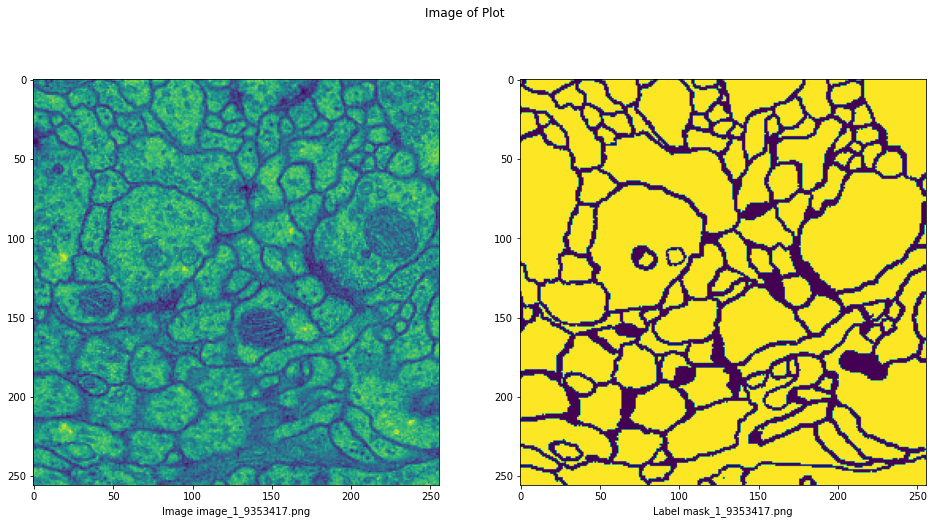

In [ ]:
# Khởi tạo subplot với 1 dòng 5 cột.
fg, ax = plt.subplots(1, 2, figsize=(16, 8))
fg.suptitle('Image of Plot')

# Lựa chọn ngẫu nhiên một ảnh
rand_ind = np.random.randint(len(train_img_paths))
img_path = train_img_paths[rand_ind]
label_path = train_label_paths[rand_ind]

image = plt.imread(img_path)
ax[0].imshow(image)
ax[0].set_xlabel('Image ' + img_path.split('/')[-1])

label = plt.imread(label_path)
ax[1].imshow(label)
ax[1].set_xlabel('Label ' + label_path.split('/')[-1])

## 8.1. Khởi tạo DataGenerator

Tiếp theo chúng ta sẽ khởi tạo DataGenerator như ý tưởng mô tả trong [Bài 32 - Kĩ thuật tensorflow Dataset](https://phamdinhkhanh.github.io/2020/04/09/TensorflowDataset.html#322-customize-imagegenerator).

Ý tưởng cũng không có gì quá phức tạp:

In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence
import cv2

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self,
                 all_filenames, 
                 labels, 
                 batch_size, 
                 input_dim,
                 n_channels,
                 normalize,
                 zoom_range, 
                 rotation,
                 brightness_range,
                 shuffle=True):
        '''
        all_filenames: list toàn bộ các filename
        labels: nhãn của toàn bộ các file
        batch_size: kích thước của 1 batch
        input_dim: (width, height) đầu vào của ảnh
        n_channels: số lượng channels của ảnh
        normalize: Chuẩn hóa ảnh
        zoom_range: Kích thước scale
        rotation: Độ xoay của ảnh
        brightness_range: Độ sáng
        shuffle: có shuffle dữ liệu sau mỗi epoch hay không?
        '''
        self.all_filenames = all_filenames
        self.labels = labels
        self.batch_size = batch_size
        self.input_dim = input_dim
        self.n_channels = n_channels
        self.normalize = normalize
        self.zoom_range = zoom_range
        self.rotation = rotation
        self.brightness_range = brightness_range
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        '''
        return:
          Trả về số lượng batch/1 epoch
        '''
        return int(np.floor(len(self.all_filenames) / self.batch_size))

    def __getitem__(self, index):
        '''
        params:
          index: index của batch
        return:
          X, Y cho batch thứ index
        '''
        # Lấy ra indexes của batch thứ index
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # List all_filenames trong một batch
        all_filenames_temp = [self.all_filenames[k] for k in indexes]

        # Khởi tạo data
        X, Y = self.__data_generation(all_filenames_temp)

        return X, Y

    def on_epoch_end(self):
        '''
        Shuffle dữ liệu khi epochs end hoặc start.
        '''
        self.indexes = np.arange(len(self.all_filenames))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, all_filenames_temp):
        '''
        params:
          all_filenames_temp: list các filenames trong 1 batch
        return:
          Trả về giá trị cho một batch.
        '''
        X = np.empty((self.batch_size, *self.input_dim, self.n_channels))
        Y = np.empty((self.batch_size, *self.input_dim, self.n_channels))

        # Khởi tạo dữ liệu
        for i, (fn, label_fn) in enumerate(all_filenames_temp):
            # Đọc file từ folder name
            img = cv2.imread(fn)
            label = cv2.imread(label_fn)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.input_dim)
            label = cv2.resize(label, self.input_dim)
          
            if self.normalize:
              mean1 = np.mean(img, axis=0)
              std1 = np.std(img, axis=0)
              img = (img-mean1)/std1

            if self.zoom_range:
              zoom_scale = 1/np.random.uniform(self.zoom_range[0], self.zoom_range[1])
              (h, w, c) = img.shape
              img = cv2.resize(img, (int(h*zoom_scale), int(w*zoom_scale)), interpolation = cv2.INTER_LINEAR)
              label = cv2.resize(label, (int(h*zoom_scale), int(w*zoom_scale)), interpolation = cv2.INTER_LINEAR)
              label = label/255
              label[label > 0.5] = 1
              label[label < 0.5] = 0
              (h_rz, w_rz, c) = img.shape
              start_w = np.random.randint(0, w_rz-w) if (w_rz-w) > 0 else 0
              start_h = np.random.randint(0, h_rz-h) if (h_rz-h) > 0 else 0
              # print(start_w, start_h)
              img = img[start_h:(start_h+h), start_w:(start_w+w), :].copy()
              label = label[start_h:(start_h+h), start_w:(start_w+w), :].copy()
            
            if self.rotation:
              (h, w, c) = img.shape
              angle = np.random.uniform(-self.rotation, self.rotation)
              RotMat = cv2.getRotationMatrix2D(center = (w, h), angle=angle, scale=1)
              img = cv2.warpAffine(img, RotMat, (w, h))
              label = cv2.warpAffine(label, RotMat, (w, h))

            if self.brightness_range:
              scale_bright = np.random.uniform(self.brightness_range[0], self.brightness_range[1])
              img = img*scale_bright

            label = label > 0.5
            X[i,] = img
            # Lưu class
            Y[i,] = label
        return X, Y

In [ ]:
train_generator = DataGenerator(
    all_filenames = list(zip(train_img_paths, train_label_paths)),
    labels = train_label_paths,
    batch_size = 8,
    input_dim = (512, 512),
    n_channels = 3,
    normalize = False,
    zoom_range = [0.5, 1],
    rotation = False,
    brightness_range=[0.8, 1],
    shuffle = True
)

val_generator = DataGenerator(
    all_filenames = list(zip(val_img_paths, val_label_paths)),
    labels = val_label_paths,
    batch_size = 8,
    input_dim = (512, 512),
    n_channels = 3,
    normalize = False,
    zoom_range = [0.5, 1],
    rotation = False,
    brightness_range=[0.8, 1],
    shuffle = True
)

X_batch, Y_batch = train_generator.__getitem__(index=0)
print(X_batch.shape, Y_batch.shape)

(8, 512, 512, 3) (8, 512, 512, 3)


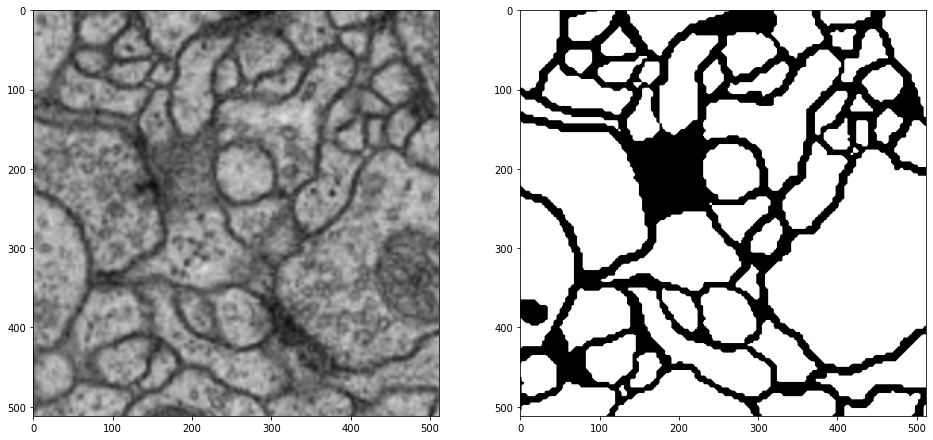

In [ ]:
# Khởi tạo subplot với 1 dòng 2 cột.
rand_ind = np.random.randint(8)

plt.subplots(figsize=(16, 8))
plt.subplot(121)
plt.imshow(X_batch[rand_ind]/255)
plt.subplot(122)
plt.imshow(Y_batch[rand_ind])

## 8.2. Huấn luyện mô hình

In [ ]:
model3 = _create_model2()

history = model3.fit_generator(train_generator,
          steps_per_epoch=len(train_generator),
          validation_data=val_generator,
          validation_steps=5,
          epochs=100,
          callbacks = (EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))
          )

Epoch 1/100
9/9 [==============================] - 8s 885ms/step - loss: 0.3921 - accuracy: 0.8348 - val_loss: 0.4050 - val_accuracy: 0.8416
Epoch 2/100
9/9 [==============================] - 8s 879ms/step - loss: 0.3597 - accuracy: 0.8456 - val_loss: 0.3165 - val_accuracy: 0.8597
Epoch 3/100
9/9 [==============================] - 8s 875ms/step - loss: 0.3287 - accuracy: 0.8541 - val_loss: 0.3252 - val_accuracy: 0.8559
Epoch 4/100
9/9 [==============================] - 8s 871ms/step - loss: 0.3223 - accuracy: 0.8568 - val_loss: 0.3209 - val_accuracy: 0.8587
Epoch 5/100
9/9 [==============================] - 8s 872ms/step - loss: 0.3270 - accuracy: 0.8558 - val_loss: 0.3805 - val_accuracy: 0.8412
Epoch 6/100
9/9 [==============================] - 8s 868ms/step - loss: 0.3522 - accuracy: 0.8492 - val_loss: 0.3192 - val_accuracy: 0.8631
Epoch 7/100
9/9 [==============================] - 8s 881ms/step - loss: 0.3398 - accuracy: 0.8553 - val_loss: 0.3488 - val_accuracy: 0.8448


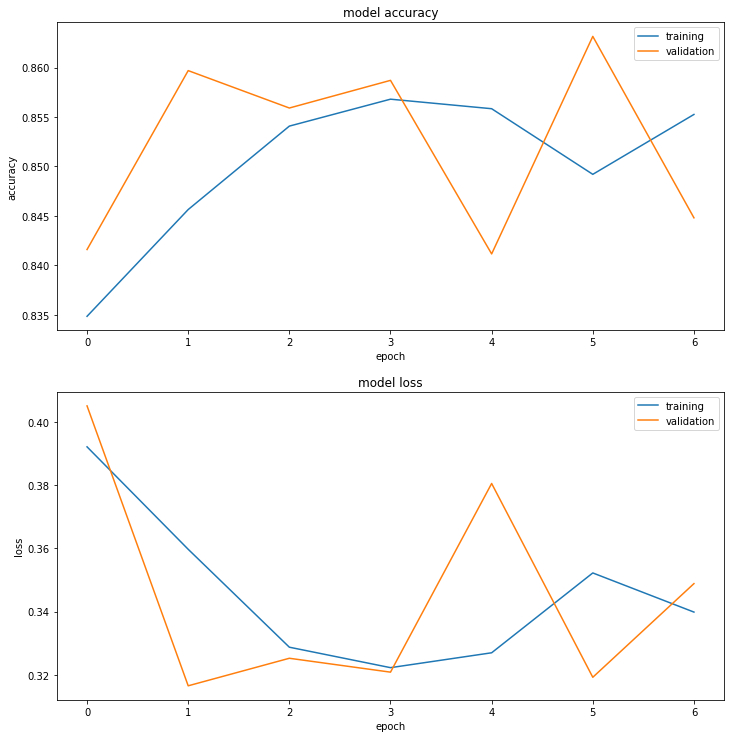

In [ ]:
plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

Nhận xét, sau khi thực hiện data augumentation, mô hình của chúng ta đã gia tăng độ chính xác trên cả hai tập training và validation lên gần 85%. So với kết quả trước đó chỉ 70% thì đây là một cải thiện đáng kể.

Như vậy bổ sung data đã mang lại hiệu quả cao trong dự báo.


# 9. Dự báo

Sau khi huấn luyện xong mô hình, chúng ta cùng kiểm tra kết quả dự báo của mô hình cho một bức ảnh cụ thể

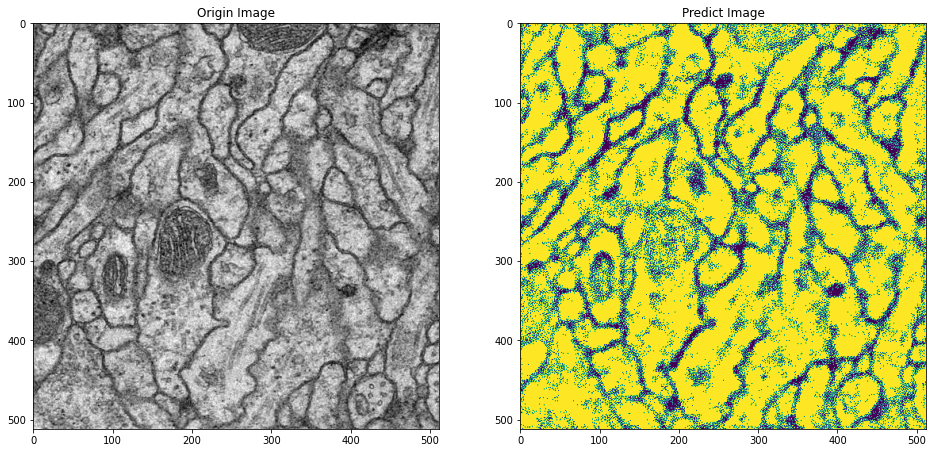

In [ ]:
import glob2

test_paths = glob2.glob('unet/data/membrane/test/*.png')
test_paths = [path for path in test_paths if 'predict' not in path]

rand_ind = np.random.randint(5)
path = test_paths[rand_ind]

def _predict_path(path, figsize = (16, 8)):
  img = cv2.imread(path)
  img = cv2.resize(img, (512, 512), cv2.INTER_LINEAR)
  img_expand = img[np.newaxis, ...]
  img_pred = model3.predict(img_expand).reshape(512, 512)
  img_pred[img_pred < 0.5] = 0
  img_pred[img_pred >= 0.5] = 1
  plt.subplots(figsize = figsize)
  plt.subplot(122)
  plt.title('Predict Image')
  plt.imshow(img_pred)
  plt.subplot(121)
  plt.title('Origin Image')
  plt.imshow(img)

_predict_path(path)

Do dự đoán vẫn còn khoảng 15% sai số nhãn nên bức ảnh dự báo vẫn tồn tại nhiễu. Để tăng thêm độ chuẩn xác hơn nữa có một số hướng cải thiện sau đây:

* Xây dựng một mô hình với độ sâu lớn hơn, đồng thời hạn chế việc giảm kích thước của các block CNN ở encoder quá sâu. Việc giảm kích thước sâu sẽ gây mất mát thông tin về không gian của các điểm dữ liệu như [Bài 41 - DeepLab Sentiment Segmentation](https://phamdinhkhanh.github.io/2020/06/18/DeepLab.html#3-deeplabv3) mình đã phân tích.

* Sử dụng Conditional Random Field để đưa thêm yếu tố tương quan về vị trí và cường độ của điểm ảnh tới nhãn của ảnh. Xem thêm [CRF - Bài 41](https://phamdinhkhanh.github.io/2020/06/18/DeepLab.html#25-layer-k%E1%BA%BFt-n%E1%BB%91i-to%C3%A0n-b%E1%BB%99-crf)
* Sử dụng bộ lọc Dilade và Erode để xóa phông và làm rõ đường biên. Xem thêm [Morphological Transformations](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html).

Mình không thực hiện mà dành cho bạn đọc nghiên cứu như một bài tập.

